# LearnLissajous course evaluation

The objective here is to generate insights based on the resulting data from the course application to a group of heterogenous students

In [9]:
# just reading the files
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
directoryPath = "./LearnLissajous/"
results = {}
for file_name in glob.glob(directoryPath+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    username = file_name.split("/")[-1][:-4]
    results[username] =  x

### Result for a certain student

In [10]:
pd.DataFrame(results.keys(), columns=["student"]).sort_values("student").reset_index()

,index,student
0,26,bo
1,13,daniel-saravali
2,16,davibai1006
3,28,estknowledge
4,8,felipehu
5,17,fishboy1900
6,29,frederico_schiffner
7,22,gui-lodi
8,0,guipolezel
9,5,h-lefundes


In [11]:
results["joaogrudka"]

,Title,Type,Start time,End time,Graduation,Status
0,Vamos nos conhecer um pouco,Lesson,2021-08-27 02:26:53,2021-08-27 02:26:53,NaN,Completed
1,Introdução,Lesson,2021-08-27 02:31:37,2021-08-27 02:31:37,NaN,Completed
2,Avaliação de conhecimentos prévios,Quiz,2021-08-27 02:31:48,2021-08-27 02:37:25,Passed,Completed
3,Avaliação de conhecimentos prévios (Parte 2),Quiz,2021-08-27 02:37:37,2021-08-27 02:40:36,Passed,Completed
4,Construção geométrica: Curvas e Lugar geométrico,Lesson,2021-08-27 02:45:48,2021-08-27 02:45:48,NaN,Completed
5,Mecanismos que descrevem movimentos harmônicos,Lesson,2021-09-09 18:50:03,2021-09-09 18:50:03,NaN,Completed
6,Projeto de Mecanismo para desenhar padrões de ...,Lesson,2021-09-09 18:51:33,2021-09-09 18:51:33,NaN,Completed
7,Avaliação Final (Parte 1),Quiz,2021-09-09 18:51:44,2021-09-09 19:07:42,Failed,Completed
8,Avaliação Final (Parte 2),Quiz,2021-09-09 19:10:56,2021-09-09 20:04:50,Failed,Completed
9,Avaliação Final (Parte 3),Quiz,2021-09-09 20:45:59,2021-09-09 20:51:21,Passed,Completed


---

## Aggregated quadrants for pair 12 and 34.

In [40]:
full_df = pd.DataFrame()

for student in list(results.keys()):

    df = results[student][results[student]["Type"] == "Quiz"].copy()
    df["student"] = student
    df = df.set_index("Title")
    df = df.drop("Avaliação de conhecimentos prévios", errors="ignore")
    df = df.drop("Avaliação de conhecimentos prévios (Parte 2)", errors="ignore")
    df = df.reset_index()

    for av_pair_name, av_pair in {
        "quadrant_av12": ("Avaliação Final (Parte 1)", "Avaliação Final (Parte 2)"),
        "quadrant_av34": ("Avaliação Final (Parte 3)", "Avaliação Final (Parte 4)"),
    }.items():
        av1, av2 = av_pair

        value_av1 = None
        if len(df[df["Title"] == av1]["Graduation"].tolist()) > 0:
            value_av1 = df[df["Title"] == av1]["Graduation"].tolist()[0]

        value_av2 = None
        if len(df[df["Title"] == av2]["Graduation"].tolist()) > 0:
            value_av2 = df[df["Title"] == av2]["Graduation"].tolist()[0]

        if value_av1 == "Passed" and value_av2 == "Passed":
            df[av_pair_name] = "TT"
        elif value_av1 == "Failed" and value_av2 == "Passed":
            df[av_pair_name] = "FT"
        elif value_av1 == "Passed" and value_av2 == "Failed":
            df[av_pair_name] = "TF"
        elif value_av1 == "Failed" and value_av2 == "Failed":
            df[av_pair_name] = "FF"
        
    full_df = pd.concat([full_df, df])

full_df

,Title,Type,Start time,End time,Graduation,Status,student,quadrant_av12,quadrant_av34
0,Avaliação Final (Parte 1),Quiz,2021-09-13 12:06:37,2021-09-13 12:28:24,Passed,Completed,yan_abdul,TF,FT
1,Avaliação Final (Parte 2),Quiz,2021-09-13 12:28:41,2021-09-13 12:44:03,Failed,Completed,yan_abdul,TF,FT
2,Avaliação Final (Parte 3),Quiz,2021-09-13 12:44:15,2021-09-13 12:57:02,Failed,Completed,yan_abdul,TF,FT
3,Avaliação Final (Parte 4),Quiz,2021-09-13 12:58:15,2021-09-13 13:00:32,Passed,Completed,yan_abdul,TF,FT
0,Avaliação Final (Parte 1),Quiz,2020-08-11 21:06:50,2020-08-11 21:09:38,Failed,Completed,terpomoj,FF,FT
...,...,...,...,...,...,...,...,...,...
3,Avaliação Final (Parte 4),Quiz,2021-05-26 12:16:52,2021-05-26 12:19:39,Passed,Completed,frederico_schiffner,TF,TT
0,Avaliação Final (Parte 1),Quiz,2021-08-28 11:34:49,2021-08-28 11:43:59,Passed,Completed,williamcolcioni,TF,FF
1,Avaliação Final (Parte 2),Quiz,2021-08-28 11:44:55,2021-08-28 11:45:19,Failed,Completed,williamcolcioni,TF,FF
2,Avaliação Final (Parte 3),Quiz,2021-08-28 11:45:35,2021-08-28 11:45:59,Failed,Completed,williamcolcioni,TF,FF


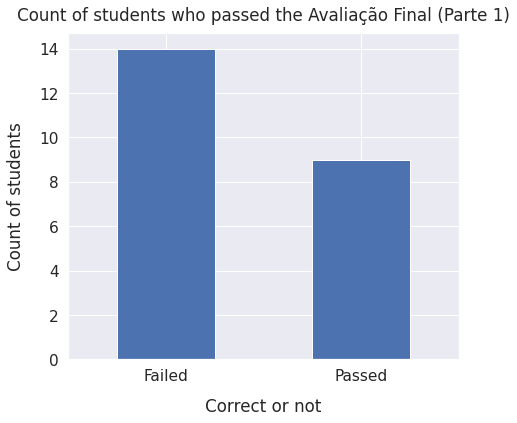

In [44]:
sns.set(font_scale=1.4)
full_df[full_df["Title"] == "Avaliação Final (Parte 1)"]["Graduation"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Passed or not", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students who passed the Avaliação Final (Parte 1)", y=1.02);

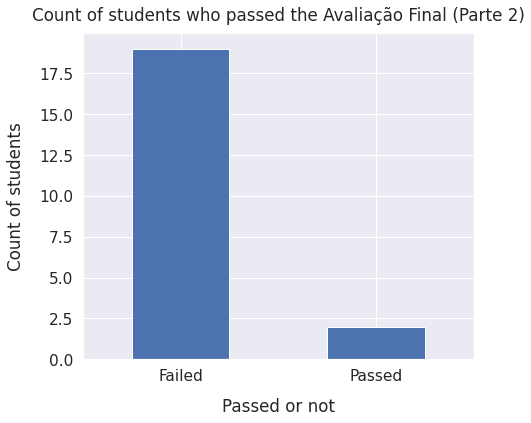

In [45]:
sns.set(font_scale=1.4)
full_df[full_df["Title"] == "Avaliação Final (Parte 2)"]["Graduation"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Passed or not", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students who passed the Avaliação Final (Parte 2)", y=1.02);

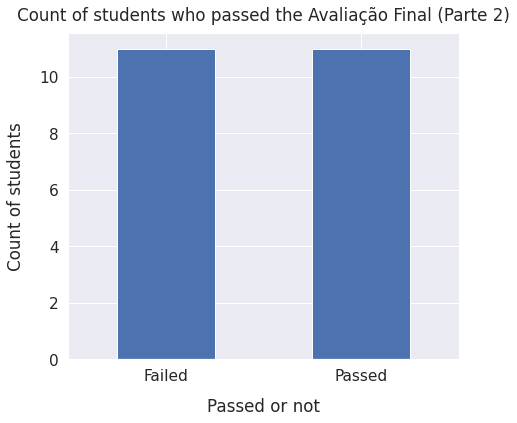

In [46]:
sns.set(font_scale=1.4)
full_df[full_df["Title"] == "Avaliação Final (Parte 3)"]["Graduation"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Passed or not", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students who passed the Avaliação Final (Parte 3)", y=1.02);

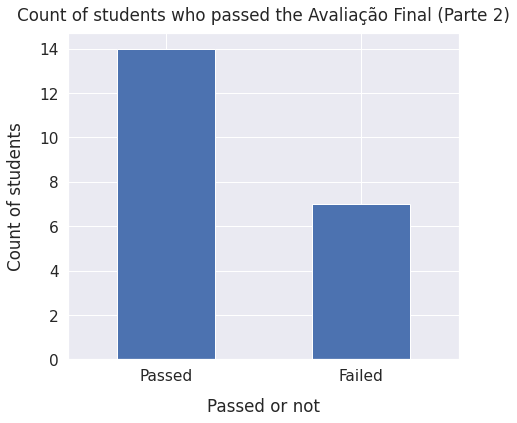

In [47]:
sns.set(font_scale=1.4)
full_df[full_df["Title"] == "Avaliação Final (Parte 4)"]["Graduation"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Passed or not", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students who passed the Avaliação Final (Parte 3)", y=1.02);

## Quadrants

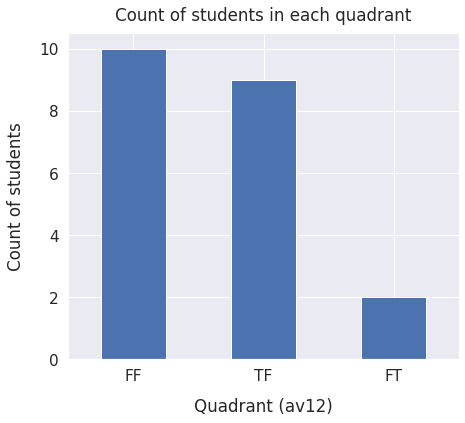

In [51]:
full_df[['student', 'quadrant_av12']].drop_duplicates().reset_index().drop('index', axis=1)['quadrant_av12'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Quadrant (av12)", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students in each quadrant", y=1.02);

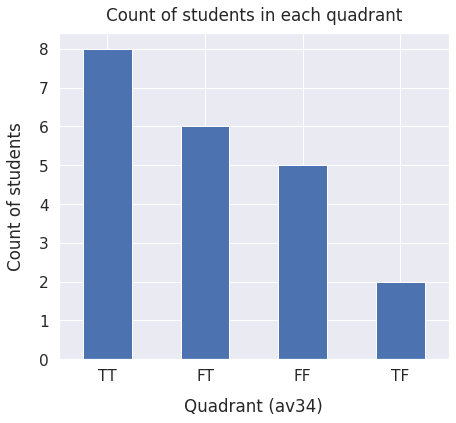

In [52]:
full_df[['student', 'quadrant_av34']].drop_duplicates().reset_index().drop('index', axis=1)['quadrant_av34'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Quadrant (av34)", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students in each quadrant", y=1.02);

---

### Introductory questions separated analysis

Since the 2 introductory questions were meant to measure the previous knowledge, before taking the course, they did not have a minimum value to pass.

Thus we everybody passed.

Now we need to observe how each student performed in the detailed result, not general.

In [48]:
# just reading the files
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
directoryPath = "./LearnLissajousIntro/"
results_question1 = {}
results_question2 = {}
for file_name in glob.glob(directoryPath+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    a = file_name.split("/")[-1][:-4].split("_")
    username = a[0]
    introductory_question_number = a[1][-1]
    if introductory_question_number == "1":
        results_question1[username] =  x
    if introductory_question_number == "2":
        results_question2[username] =  x

### All students

In [49]:
pd.DataFrame(results_question2.keys(), columns=["student"]).sort_values("student").reset_index()

,index,student
0,24,daniel-saravali
1,9,davibai1006
2,8,estknowledge
3,23,felipehu
4,5,fellipy
5,19,fishboy1900
6,7,gui-lodi
7,15,guipolezel
8,1,h-lefundes
9,25,joaogrudka


---

### Aggregated result for all students about the 2 introductory questions

In [27]:
all_students = list(set(list(results_question1.keys()) + list(results_question2.keys())))

full_df = None

students_that_did_not_take_both_tests = []

for student in all_students:
    if student not in results_question1 or student not in results_question2:
        students_that_did_not_take_both_tests += [student]
        continue # skipping students that did not take both tests

    student_quadrant = "--"
    if results_question1[student]['Correct'][0] == True and results_question2[student]['Correct'][0] == True:
        student_quadrant = "TT"
    elif  results_question1[student]['Correct'][0] == False and results_question2[student]['Correct'][0] == True:
        student_quadrant = "FT"
    elif  results_question1[student]['Correct'][0] == True and results_question2[student]['Correct'][0] == False:
        student_quadrant = "TF"
    elif  results_question1[student]['Correct'][0] == False and results_question2[student]['Correct'][0] == False:
        student_quadrant = "FF"

    df = pd.concat([results_question2[student], results_question1[student]])
    df["student"] = student
    df["quadrant"] = student_quadrant
    if full_df is None:
        full_df = df
    else:
        full_df = pd.concat([full_df, df])
df_final = full_df.reset_index().drop(['index'], axis=1)
df_final

,Question,Type,Retake,Correct,Retake detail,student,quadrant
0,Frequência angular com Lissajous 2,single_choice,0,True,NaN,topcat,FT
1,Frequência Angular com Lissajous,single_choice,0,False,NaN,topcat,FT
2,Frequência angular com Lissajous 2,single_choice,0,False,NaN,rccampos,TF
3,Frequência Angular com Lissajous,single_choice,0,True,NaN,rccampos,TF
4,Frequência angular com Lissajous 2,single_choice,0,False,NaN,williamcolcioni,FF
5,Frequência Angular com Lissajous,single_choice,0,False,NaN,williamcolcioni,FF
6,Frequência angular com Lissajous 2,single_choice,0,False,NaN,renan,FF
7,Frequência Angular com Lissajous,single_choice,0,False,NaN,renan,FF
8,Frequência angular com Lissajous 2,single_choice,0,False,NaN,lukinhasloko123,FF
9,Frequência Angular com Lissajous,single_choice,0,False,NaN,lukinhasloko123,FF


## Result graphs for the first 2 questions

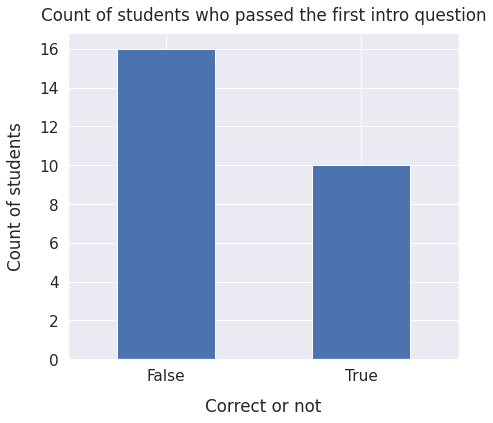

In [14]:
sns.set(font_scale=1.4)
df_final[df_final["Question"] == "Frequência Angular com Lissajous"]["Correct"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Correct or not", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students who passed the first intro question", y=1.02);


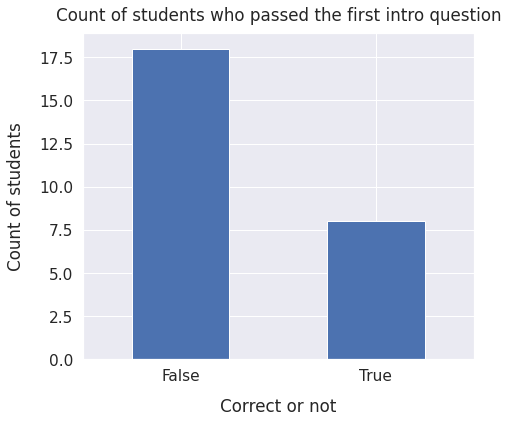

In [17]:
sns.set(font_scale=1.4)
df_final[df_final["Question"] == "Frequência angular com Lissajous 2"]["Correct"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Correct or not", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students who passed the first intro question", y=1.02);

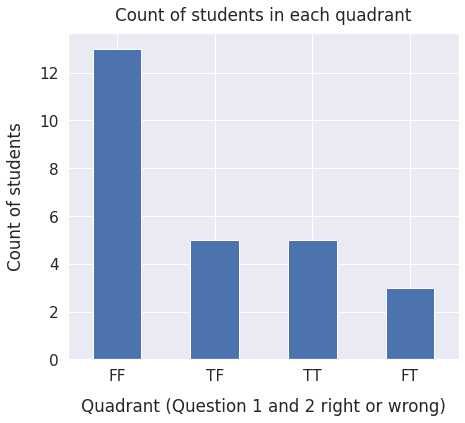

In [39]:
df_final[['student', 'quadrant']].drop_duplicates().reset_index().drop('index', axis=1)['quadrant'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Quadrant (Question 1 and 2 right or wrong)", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students in each quadrant", y=1.02);